# 在下采样前进行滤波
此示例说明如何在下采样前进行滤波以减轻混叠造成的失真。您可以使用 decimate 或 resample 以通过一个函数进行滤波和下采样。您也可以先对数据进行低通滤波，然后使用 downsample。创建基带频谱支持大于 π 弧度的信号。使用 decimate 以在下采样之前通过 10 阶 Chebyshev I 类低通滤波器对信号滤波。

创建信号并绘制幅值频谱。

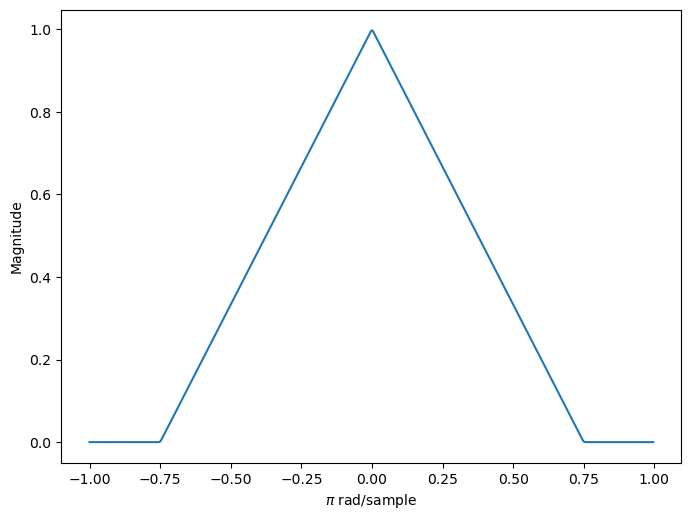

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import *

f = [0,0.2500,0.5000,0.7500,1.0000]
a = [1.00,0.6667,0.3333,0,0]
nf=512
b1=signal.firwin2(nf-1, f,a, nfreqs=None, window='hamming', nyq=None, antisymmetric=False, fs=None)
[h1,h2]=fft.fftshift(signal.freqz(b1, 1, nf, whole=True, plot=None, fs=2*np.pi, include_nyquist=False))
omg=np.linspace(-np.pi,np.pi-2*np.pi/nf,nf)
fig = plt.figure(dpi=100,figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.plot(omg/np.pi,abs(h1))
plt.xlabel('$\pi$ rad/sample')
plt.ylabel('Magnitude')
plt.show()

使用 10 阶 Chebyshev I 类低通滤波器对信号进行滤波，然后以 2 为因子下采样。绘制原始信号以及经过滤波和下采样的信号的幅值频谱。低通滤波器减少了区间 [−π/2,π/2] 之外的混叠失真量。

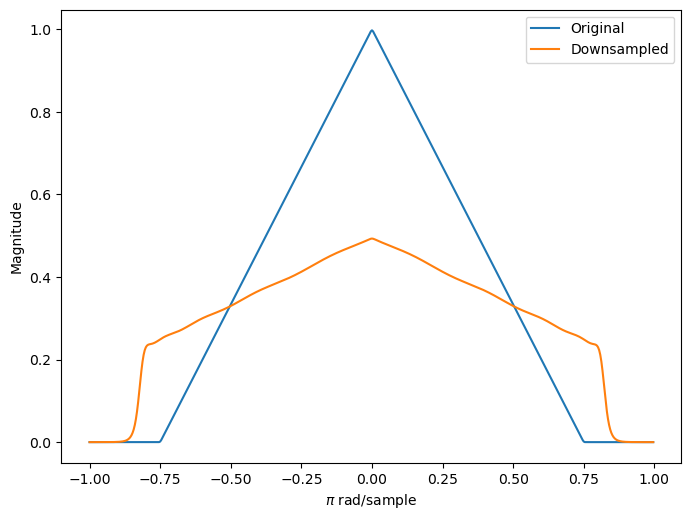

In [10]:
y = signal.decimate(b1,2,10)
[h3,h4]=fft.fftshift(signal.freqz(y, 1, nf, whole=True, plot=None, fs=2*np.pi, include_nyquist=False))
fig = plt.figure(dpi=100,figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.plot(omg/np.pi,abs(h1),label='Original')
ax1.plot(omg/np.pi,abs(h3),label='Downsampled')
plt.xlabel('$\pi$ rad/sample')
plt.ylabel('Magnitude')
plt.legend()
plt.show()